In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix

In [95]:
d = pd.read_csv(r'D:\Desktop\city_day.csv')
print(d)

                City        Date  PM2.5   PM10     NO    NO2    NOx    NH3  \
0          Ahmedabad  2015-01-01    NaN    NaN   0.92  18.22  17.15    NaN   
1          Ahmedabad  2015-01-02    NaN    NaN   0.97  15.69  16.46    NaN   
2          Ahmedabad  2015-01-03    NaN    NaN  17.40  19.30  29.70    NaN   
3          Ahmedabad  2015-01-04    NaN    NaN   1.70  18.48  17.97    NaN   
4          Ahmedabad  2015-01-05    NaN    NaN  22.10  21.42  37.76    NaN   
...              ...         ...    ...    ...    ...    ...    ...    ...   
29526  Visakhapatnam  2020-06-27  15.02  50.94   7.68  25.06  19.54  12.47   
29527  Visakhapatnam  2020-06-28  24.38  74.09   3.42  26.06  16.53  11.99   
29528  Visakhapatnam  2020-06-29  22.91  65.73   3.45  29.53  18.33  10.71   
29529  Visakhapatnam  2020-06-30  16.64  49.97   4.05  29.26  18.80  10.03   
29530  Visakhapatnam  2020-07-01  15.00  66.00   0.40  26.85  14.05   5.20   

          CO    SO2      O3  Benzene  Toluene  Xylene   AQI    

In [96]:
d.head()

City        Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN

In [97]:
d.tail()

City        Date  PM2.5   PM10    NO    NO2    NOx    NH3  \
29526  Visakhapatnam  2020-06-27  15.02  50.94  7.68  25.06  19.54  12.47   
29527  Visakhapatnam  2020-06-28  24.38  74.09  3.42  26.06  16.53  11.99   
29528  Visakhapatnam  2020-06-29  22.91  65.73  3.45  29.53  18.33  10.71   
29529  Visakhapatnam  2020-06-30  16.64  49.97  4.05  29.26  18.80  10.03   
29530  Visakhapatnam  2020-07-01  15.00  66.00  0.40  26.85  14.05   5.20   

         CO    SO2     O3  Benzene  Toluene  Xylene   AQI    AQI_Bucket  
29526  0.47   8.55  23.30     2.24    12.07    0.73  41.0          Good  
29527  0.52  12.72  30.14     0.74     2.21    0.38  70.0  Satisfactory  
29528  0.48   8.42  30.96     0.01     0.01    0.00  68.0  Satisfactory  
29529  0.52   9.84  28.30     0.00     0.00    0.00  54.0  Satisfactory  
29530  0.59   2.10  17.05      NaN      NaN     NaN  50.0          Good

In [98]:
d.shape

(29531, 16)

In [99]:
d.describe()

PM2.5          PM10            NO           NO2           NOx  \
count  24933.000000  18391.000000  25949.000000  25946.000000  25346.000000   
mean      67.450578    118.127103     17.574730     28.560659     32.309123   
std       64.661449     90.605110     22.785846     24.474746     31.646011   
min        0.040000      0.010000      0.020000      0.010000      0.000000   
25%       28.820000     56.255000      5.630000     11.750000     12.820000   
50%       48.570000     95.680000      9.890000     21.690000     23.520000   
75%       80.590000    149.745000     19.950000     37.620000     40.127500   
max      949.990000   1000.000000    390.680000    362.210000    467.630000   

                NH3            CO           SO2            O3       Benzene  \
count  19203.000000  27472.000000  25677.000000  25509.000000  23908.000000   
mean      23.483476      2.248598     14.531977     34.491430      3.280840   
std       25.684275      6.962884     18.133775     21.694928     15.811136   
min        0.010000      0.000000      0.010000      0.010000      0.000000   
25%        8.580000      0.510000      5.670000     18.860000      0.120000   
50%       15.850000      0.890000      9.160000     30.840000      1.070000   
75%       30.020000      1.450000     15.220000     45.570000      3.080000   
max      352.890000    175.810000    193.860000    257.730000    455.030000   

            Toluene        Xylene           AQI  
count  21490.000000  11422.000000  24850.000000  
mean       8.700972      3.070128    166.463581  
std       19.969164      6.323247    140.696585  
min        0.000000      0.000000     13.000000  
25%        0.600000      0.140000     81.000000  
50%        2.970000      0.980000    118.000000  
75%        9.150000      3.350000    208.000000  
max      454.850000    170.370000   2049.000000

In [100]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [101]:
d.isnull()

City   Date  PM2.5   PM10     NO    NO2    NOx    NH3     CO    SO2  \
0      False  False   True   True  False  False  False   True  False  False   
1      False  False   True   True  False  False  False   True  False  False   
2      False  False   True   True  False  False  False   True  False  False   
3      False  False   True   True  False  False  False   True  False  False   
4      False  False   True   True  False  False  False   True  False  False   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
29526  False  False  False  False  False  False  False  False  False  False   
29527  False  False  False  False  False  False  False  False  False  False   
29528  False  False  False  False  False  False  False  False  False  False   
29529  False  False  False  False  False  False  False  False  False  False   
29530  False  False  False  False  False  False  False  False  False  False   

          O3  Benzene  Toluene  Xylene    AQI  AQI_Bucket  
0      False    False    False   False   True        True  
1      False    False    False   False   True        True  
2      False    False    False   False   True        True  
3      False    False    False   False   True        True  
4      False    False    False   False   True        True  
...      ...      ...      ...     ...    ...         ...  
29526  False    False    False   False  False       False  
29527  False    False    False   False  False       False  
29528  False    False    False   False  False       False  
29529  False    False    False   False  False       False  
29530  False     True     True    True  False       False  

[29531 rows x 16 columns]

In [102]:
d.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [103]:
pmean=d["PM2.5"].mean()
d["PM2.5"].fillna(pmean,inplace=True)

In [104]:
pmmean=d["PM10"].mean()
d["PM10"].fillna(pmmean,inplace=True)

In [105]:
nmean=d["NO"].mean()
d["NO"].fillna(nmean,inplace=True)

In [106]:
nomean=d["NO2"].mean()
d["NO2"].fillna(nomean,inplace=True)

In [107]:
noxmean=d["NOx"].mean()
d["NOx"].fillna(noxmean,inplace=True)

In [108]:
nhmean=d["NH3"].mean()
d["NH3"].fillna(nhmean,inplace=True)

In [109]:
cmean=d["CO"].mean()
d["CO"].fillna(cmean,inplace=True)

In [110]:
smean=d["SO2"].mean()
d["SO2"].fillna(smean,inplace=True)

In [111]:
omean=d["O3"].mean()
d["O3"].fillna(omean,inplace=True)

In [112]:
bmean=d["Benzene"].mean()
d["Benzene"].fillna(bmean,inplace=True)

In [113]:
tmean=d["Toluene"].mean()
d["Toluene"].fillna(tmean,inplace=True)

In [114]:
xmean=d["Xylene"].mean()
d["Xylene"].fillna(xmean,inplace=True)

In [115]:
amean=d["AQI"].mean()
d["AQI"].fillna(amean,inplace=True)

In [116]:
d.isnull().sum()

City             0
Date             0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3               0
Benzene          0
Toluene          0
Xylene           0
AQI              0
AQI_Bucket    4681
dtype: int64

In [155]:
d['Date'].min()


Timestamp('2015-01-01 00:00:00')

In [156]:
d['Date'].max()

Timestamp('2020-07-01 00:00:00')

In [117]:
d

City        Date      PM2.5        PM10     NO    NO2    NOx  \
0          Ahmedabad  2015-01-01  67.450578  118.127103   0.92  18.22  17.15   
1          Ahmedabad  2015-01-02  67.450578  118.127103   0.97  15.69  16.46   
2          Ahmedabad  2015-01-03  67.450578  118.127103  17.40  19.30  29.70   
3          Ahmedabad  2015-01-04  67.450578  118.127103   1.70  18.48  17.97   
4          Ahmedabad  2015-01-05  67.450578  118.127103  22.10  21.42  37.76   
...              ...         ...        ...         ...    ...    ...    ...   
29526  Visakhapatnam  2020-06-27  15.020000   50.940000   7.68  25.06  19.54   
29527  Visakhapatnam  2020-06-28  24.380000   74.090000   3.42  26.06  16.53   
29528  Visakhapatnam  2020-06-29  22.910000   65.730000   3.45  29.53  18.33   
29529  Visakhapatnam  2020-06-30  16.640000   49.970000   4.05  29.26  18.80   
29530  Visakhapatnam  2020-07-01  15.000000   66.000000   0.40  26.85  14.05   

             NH3     CO    SO2      O3  Benzene    Toluene    Xylene  \
0      23.483476   0.92  27.64  133.36  0.00000   0.020000  0.000000   
1      23.483476   0.97  24.55   34.06  3.68000   5.500000  3.770000   
2      23.483476  17.40  29.07   30.70  6.80000  16.400000  2.250000   
3      23.483476   1.70  18.59   36.08  4.43000  10.140000  1.000000   
4      23.483476  22.10  39.33   39.31  7.01000  18.890000  2.780000   
...          ...    ...    ...     ...      ...        ...       ...   
29526  12.470000   0.47   8.55   23.30  2.24000  12.070000  0.730000   
29527  11.990000   0.52  12.72   30.14  0.74000   2.210000  0.380000   
29528  10.710000   0.48   8.42   30.96  0.01000   0.010000  0.000000   
29529  10.030000   0.52   9.84   28.30  0.00000   0.000000  0.000000   
29530   5.200000   0.59   2.10   17.05  3.28084   8.700972  3.070128   

              AQI    AQI_Bucket  
0      166.463581           NaN  
1      166.463581           NaN  
2      166.463581           NaN  
3      166.463581           NaN  
4      166.463581           NaN  
...           ...           ...  
29526   41.000000          Good  
29527   70.000000  Satisfactory  
29528   68.000000  Satisfactory  
29529   54.000000  Satisfactory  
29530   50.000000          Good  

[29531 rows x 16 columns]

# VISUALISATION 

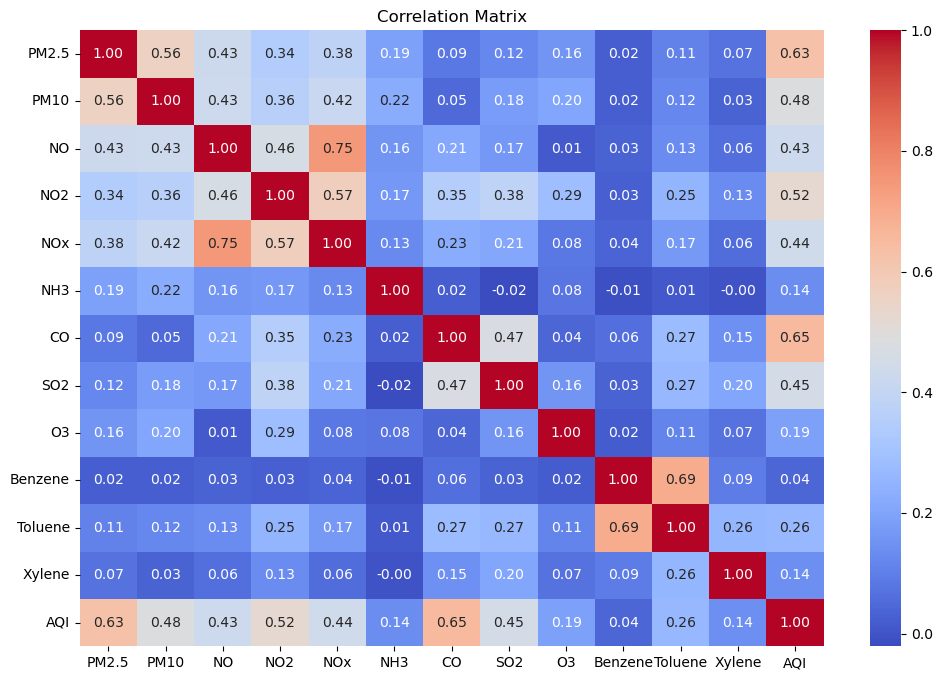

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


numeric_columns = d.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = d[numeric_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


Through correlation analysis, we can observe the relationships between different features and the target variable (AQI). Positive or negative correlations indicate how strongly features influence AQI.

For example, if we find a strong positive correlation between certain pollutants (e.g., PM2.5, PM10) and AQI, it suggests that higher levels of these pollutants contribute to poor air quality.

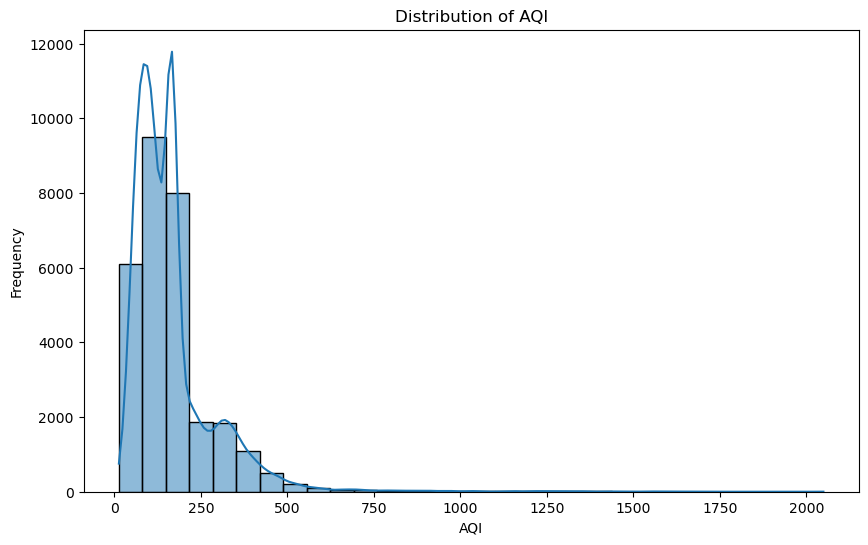

In [119]:
plt.figure(figsize=(10, 6))
sns.histplot(d['AQI'], bins=30, kde=True)
plt.title('Distribution of AQI')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.show()

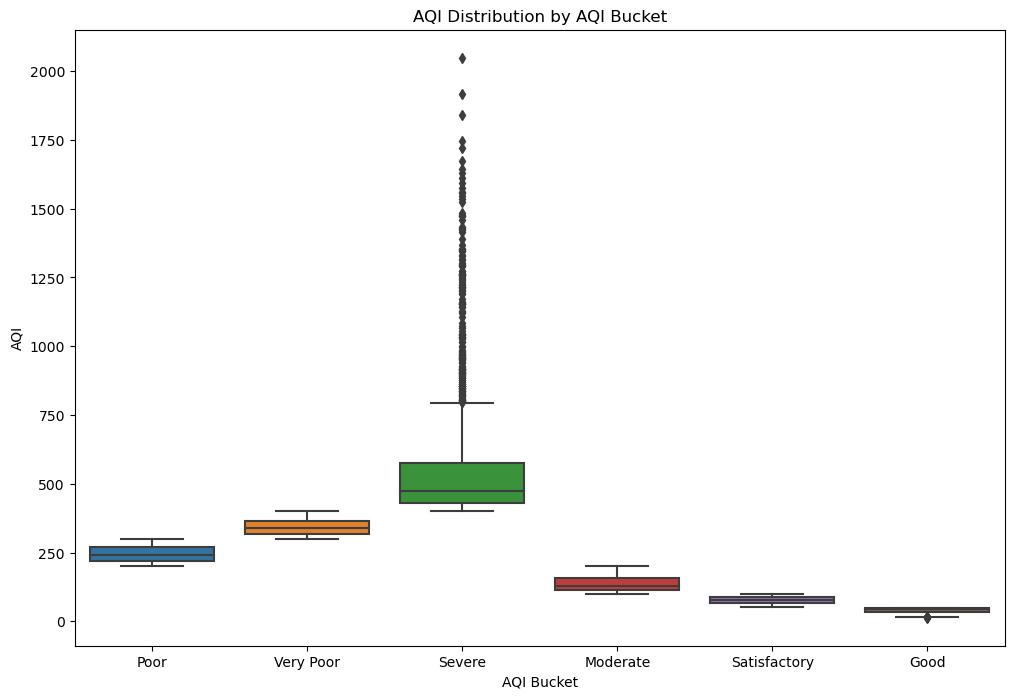

In [120]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='AQI_Bucket', y='AQI', data=d)
plt.title('AQI Distribution by AQI Bucket')
plt.xlabel('AQI Bucket')
plt.ylabel('AQI')
plt.show()

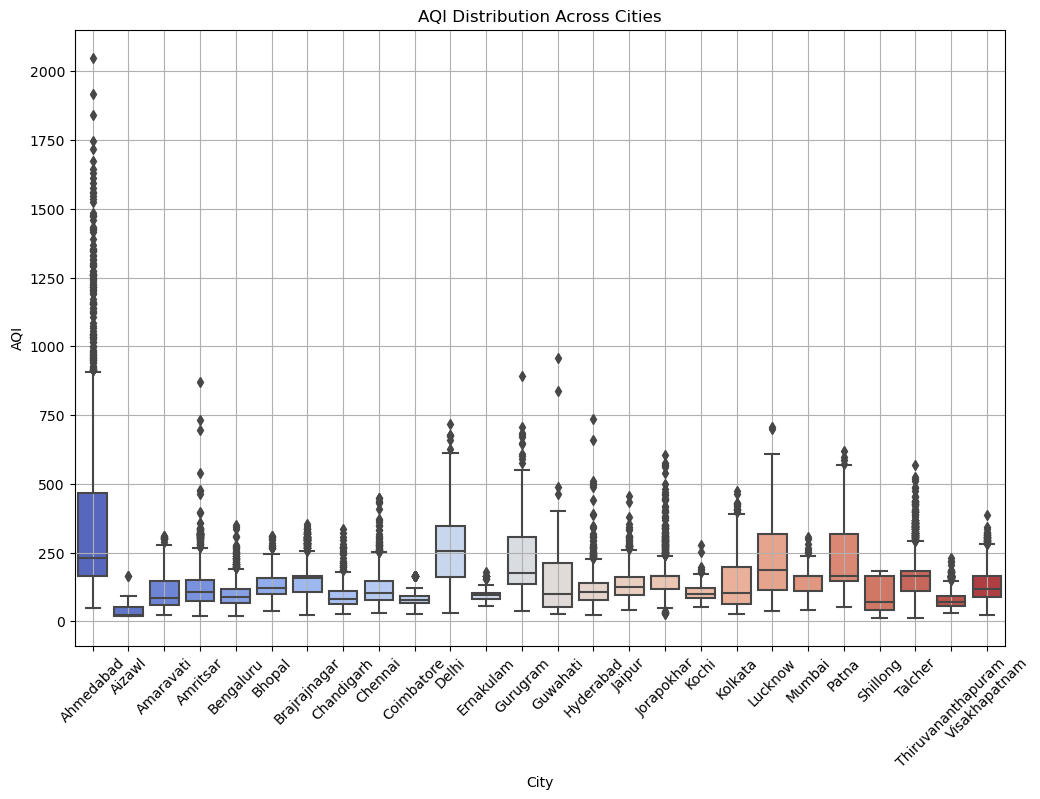

In [121]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.boxplot(x='City', y='AQI', data=d, palette='coolwarm')
plt.xticks(rotation=45)
plt.xlabel('City')
plt.ylabel('AQI')
plt.title('AQI Distribution Across Cities')
plt.grid(True)
plt.show()


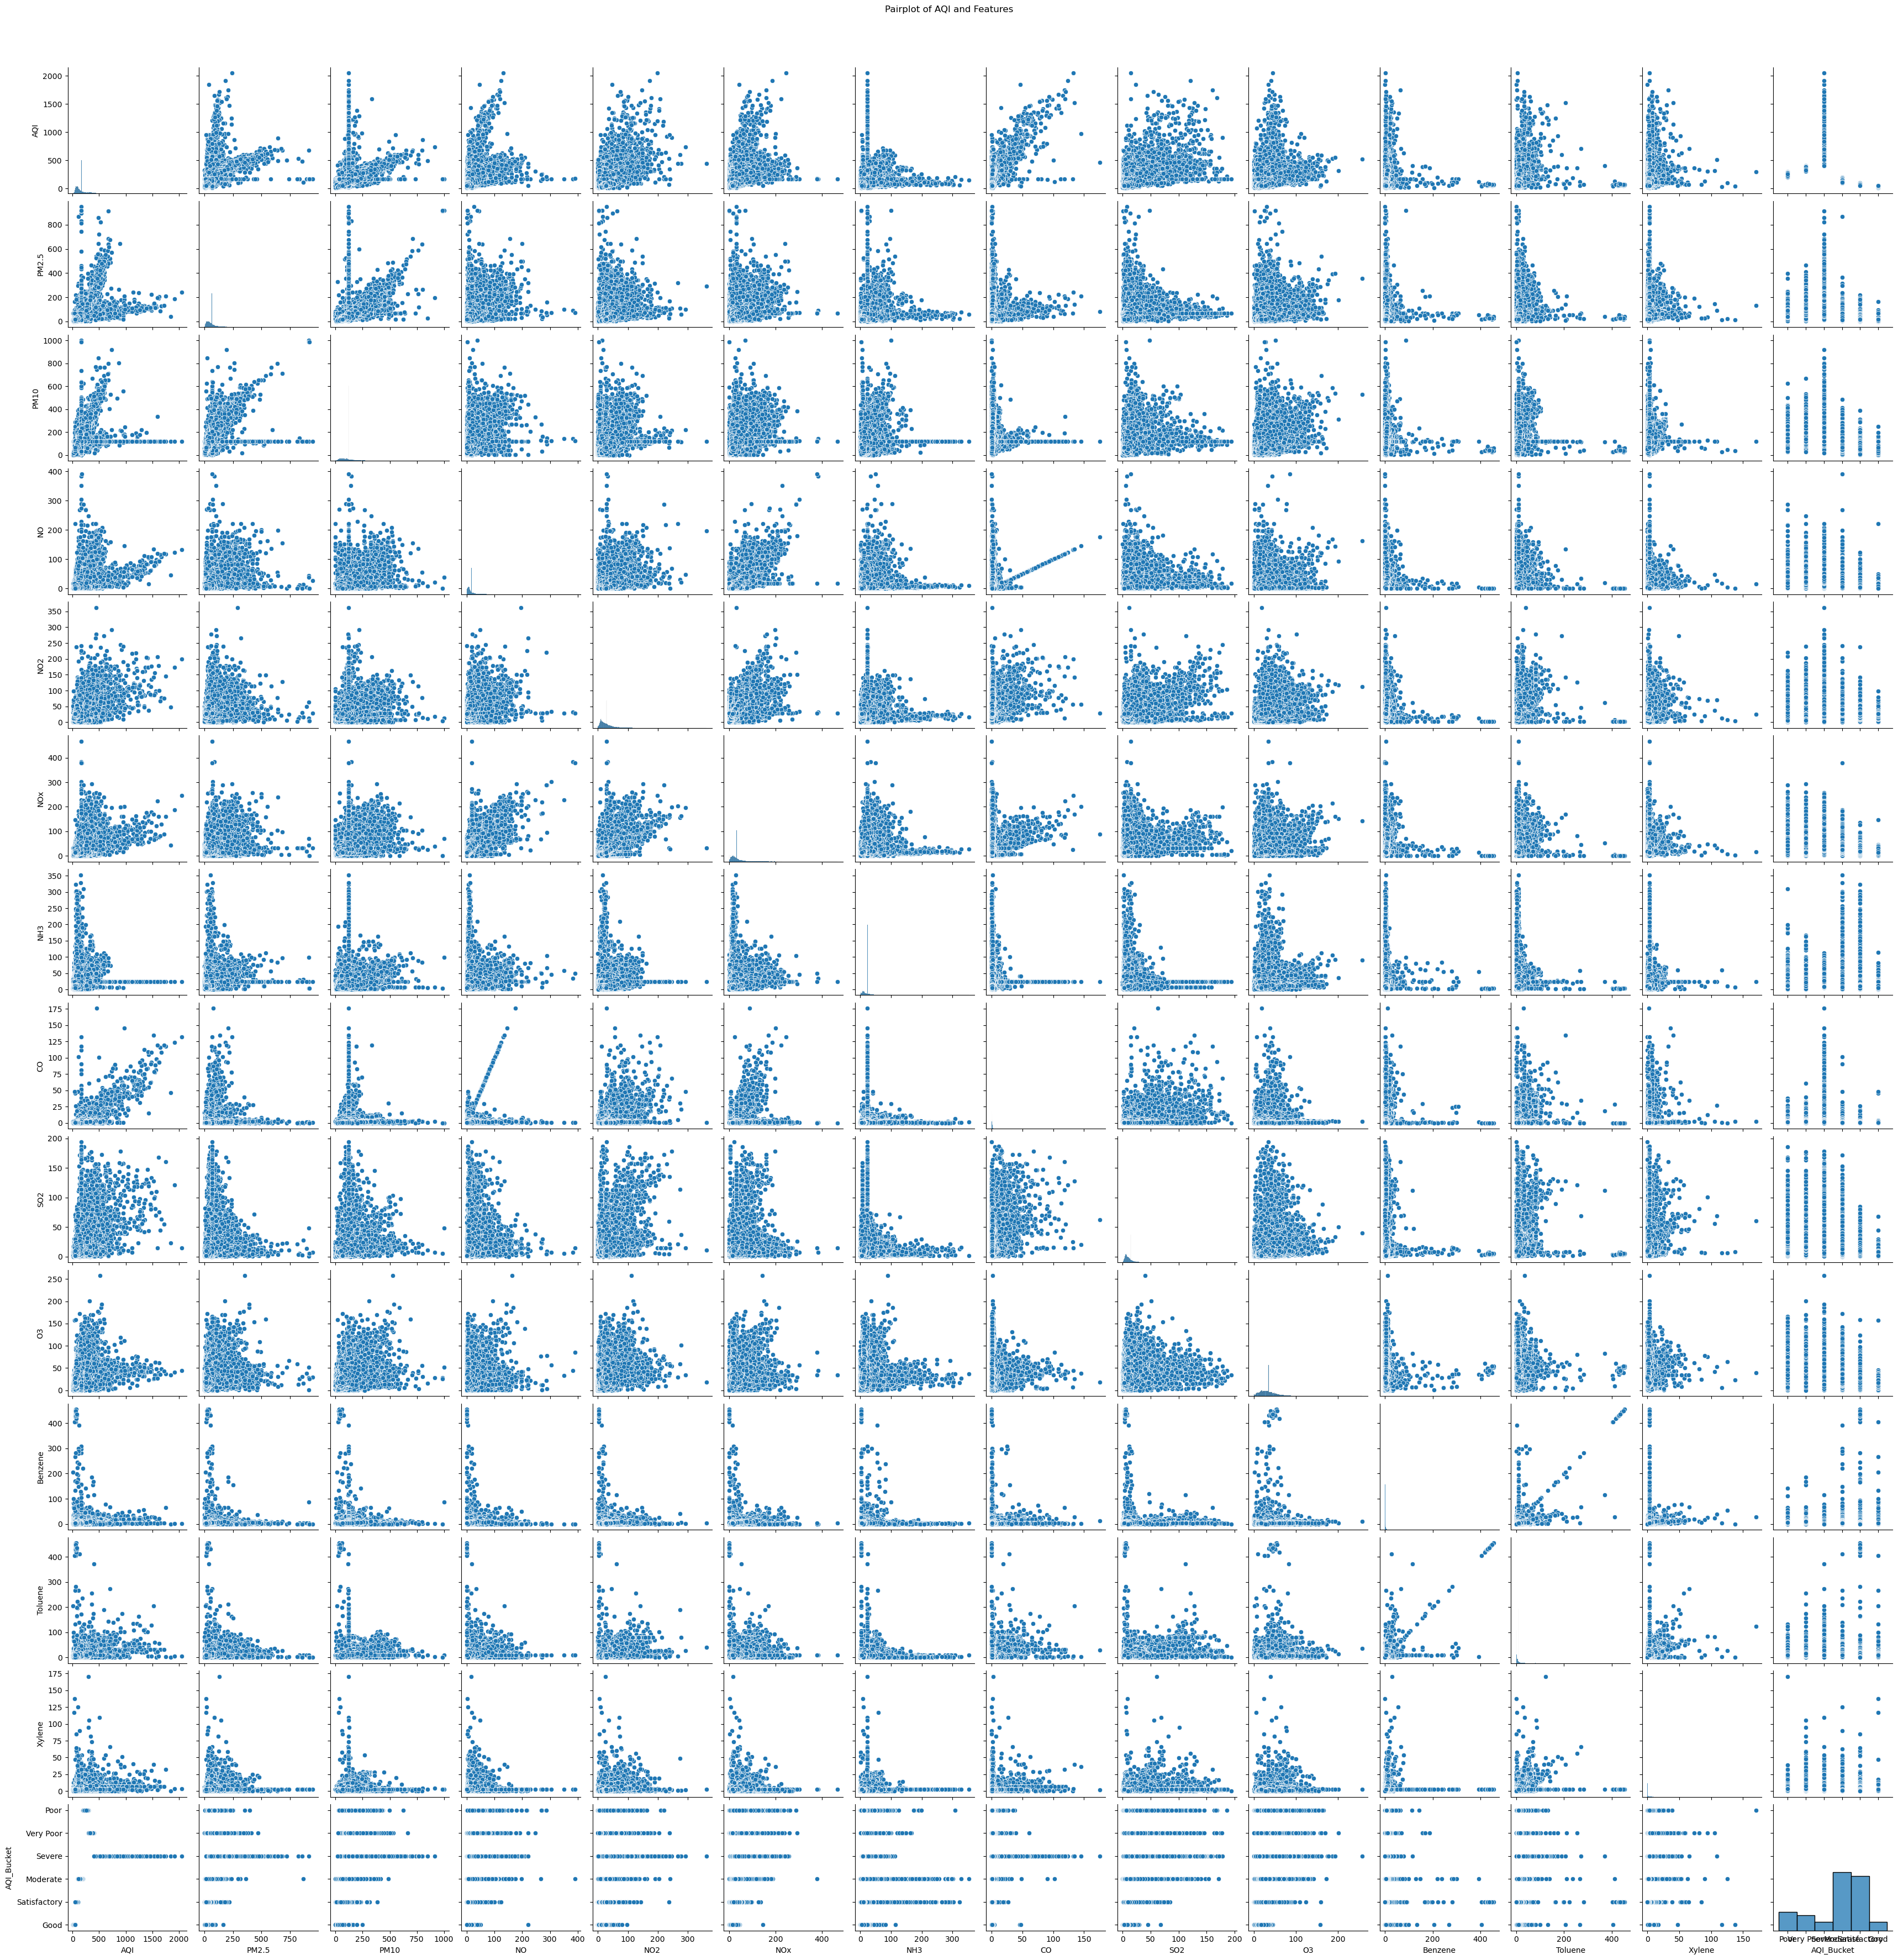

In [122]:
sns.pairplot(d, vars=['AQI', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene',  'AQI_Bucket'], kind='scatter')
plt.suptitle('Pairplot of AQI and Features', y=1.02)
plt.show()


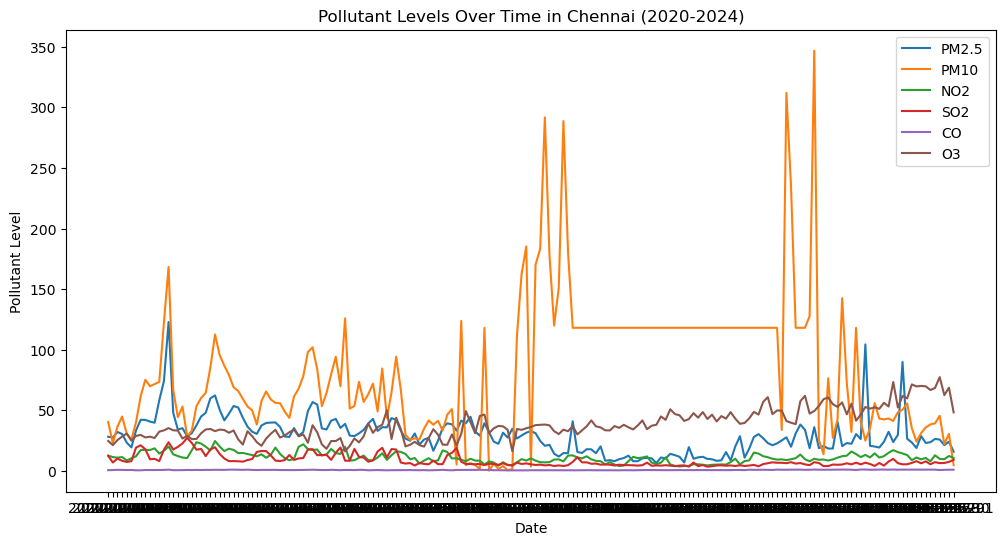

In [124]:
import matplotlib.pyplot as plt

start_date = '2020-01-01'
end_date = '2024-12-31'
filtered_data = d[(d['Date'] >= start_date) & (d['Date'] <= end_date)]

city_name = 'Chennai'

city_data = filtered_data[filtered_data['City'] == city_name]


plt.figure(figsize=(12, 6))
for pollutant in ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']:
    plt.plot(city_data['Date'], city_data[pollutant], label=pollutant)

plt.title(f'Pollutant Levels Over Time in {city_name} (2020-2024)')
plt.xlabel('Date')
plt.ylabel('Pollutant Level')
plt.legend()
plt.show()


# PREDICT THE AQI(AIR QUALITY INDEX)

In [126]:


X = d.drop(['AQI', 'AQI_Bucket', 'City', 'Date'], axis=1)  
y = d['AQI'] 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [127]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error


X = d.drop(['AQI', 'AQI_Bucket', 'City', 'Date'], axis=1)  
y = d['AQI']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
print("Linear Regression:")
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_rmse = mean_squared_error(y_test, lr_predictions, squared=False)
print("MAE:", lr_mae)
print("RMSE:", lr_rmse)


Linear Regression:
MAE: 31.539159013566213
RMSE: 54.25294683870192


Linear Regression:
Predicted AQI values: [143.40963188 143.40963188 134.10184579 ... 125.34189815  88.56116019
 142.30478205]


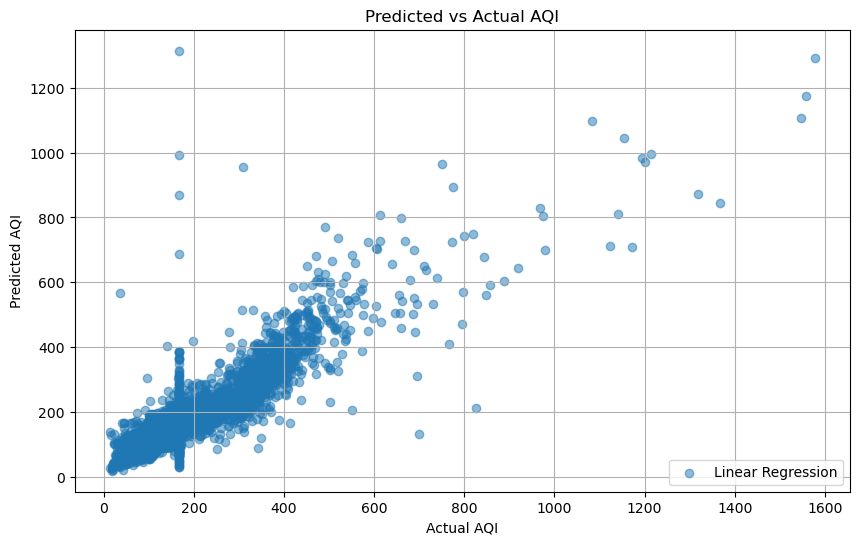

In [128]:
import matplotlib.pyplot as plt

print("Linear Regression:")
print("Predicted AQI values:", lr_predictions)


plt.figure(figsize=(10, 6))

plt.scatter(y_test, lr_predictions, label='Linear Regression', alpha=0.5)

plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Predicted vs Actual AQI')
plt.legend()
plt.grid(True)
plt.show()


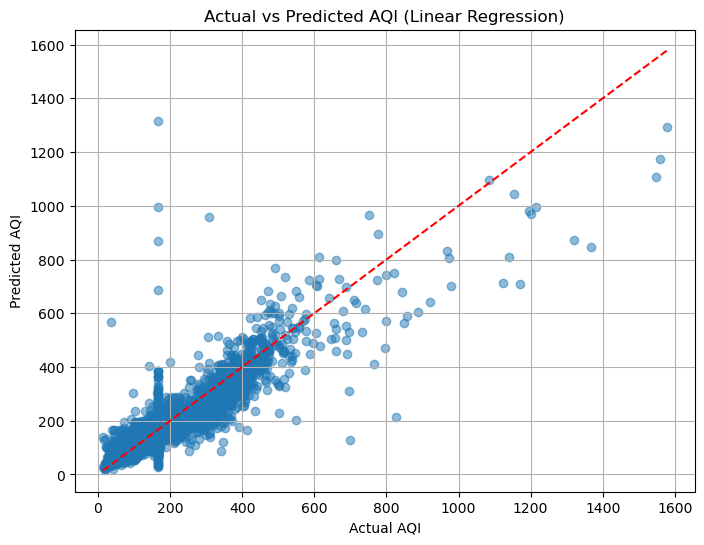

In [130]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, lr_predictions, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted AQI (Linear Regression)')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.grid(True)
plt.show()


In [131]:
from sklearn.ensemble import RandomForestRegressor

# Random Forests
print("\nRandom Forests:")
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)
print("MAE:", rf_mae)
print("RMSE:", rf_rmse)



Random Forests:
MAE: 20.360862287376438
RMSE: 41.76649557913025



Random Forests:
Predicted AQI values: [166.46358149 166.46358149 137.95708652 ... 110.27854326  72.52
 148.69635815]


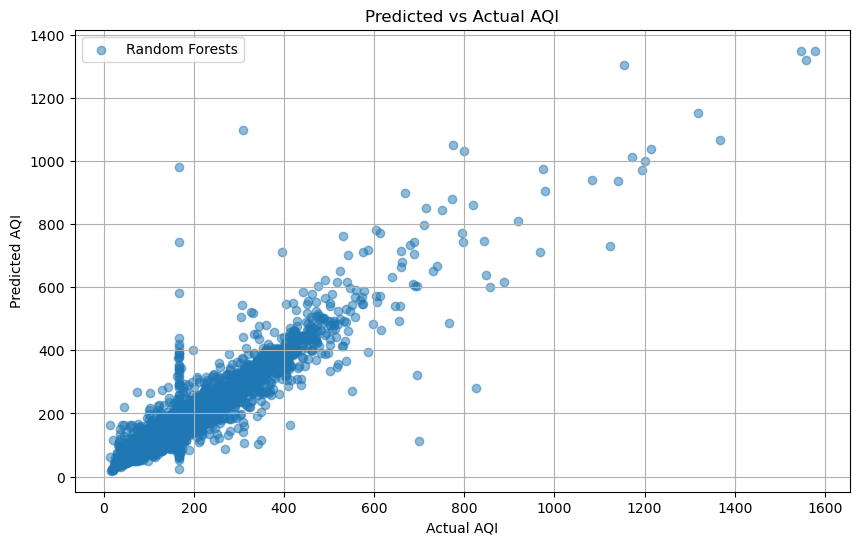

In [132]:
import matplotlib.pyplot as plt



print("\nRandom Forests:")
print("Predicted AQI values:", rf_predictions)


plt.figure(figsize=(10, 6))


plt.scatter(y_test, rf_predictions, label='Random Forests', alpha=0.5)


plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Predicted vs Actual AQI')
plt.legend()
plt.grid(True)
plt.show()


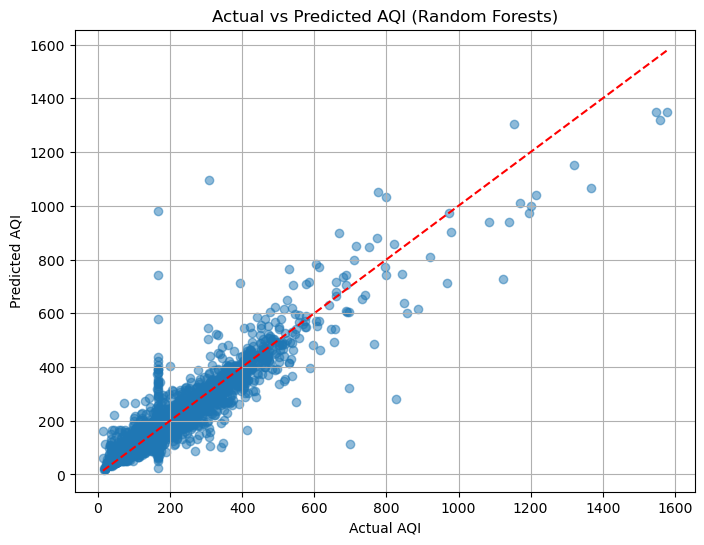

In [133]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_predictions, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted AQI (Random Forests)')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.grid(True)
plt.show()


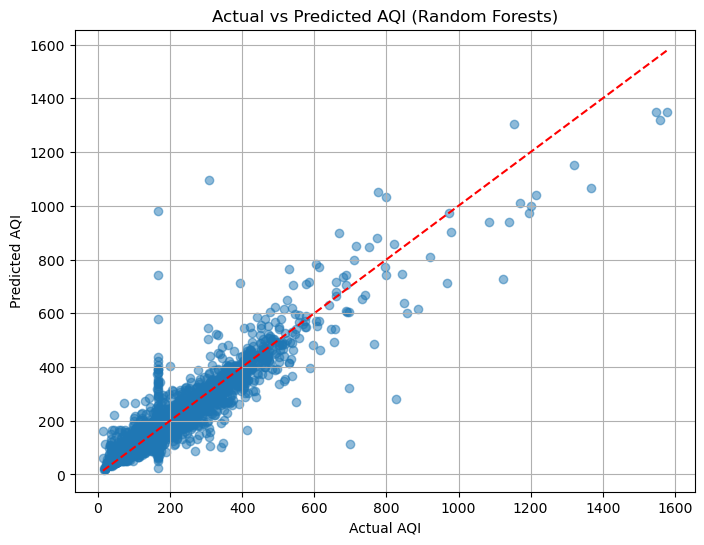

In [134]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_predictions, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted AQI (Random Forests)')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.grid(True)
plt.show()


In [135]:
from sklearn.neural_network import MLPRegressor

print("\nNeural Networks:")
nn_model = MLPRegressor(random_state=42)
nn_model.fit(X_train, y_train)
nn_predictions = nn_model.predict(X_test)
nn_mae = mean_absolute_error(y_test, nn_predictions)
nn_rmse = mean_squared_error(y_test, nn_predictions, squared=False)
print("MAE:", nn_mae)
print("RMSE:", nn_rmse)



Neural Networks:
MAE: 25.136710616034293
RMSE: 46.201971031487965



Neural Networks:
Predicted AQI values: [141.08094224 141.08094224 142.31761313 ... 109.13043118  85.456317
 122.05639738]


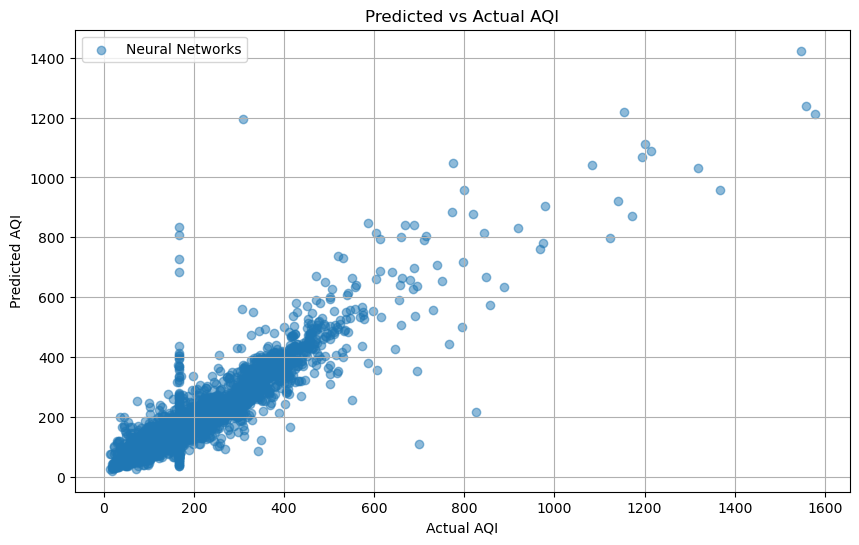

In [136]:
print("\nNeural Networks:")
print("Predicted AQI values:", nn_predictions)

plt.figure(figsize=(10, 6))

plt.scatter(y_test, nn_predictions, label='Neural Networks', alpha=0.5)

plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Predicted vs Actual AQI')
plt.legend()
plt.grid(True)

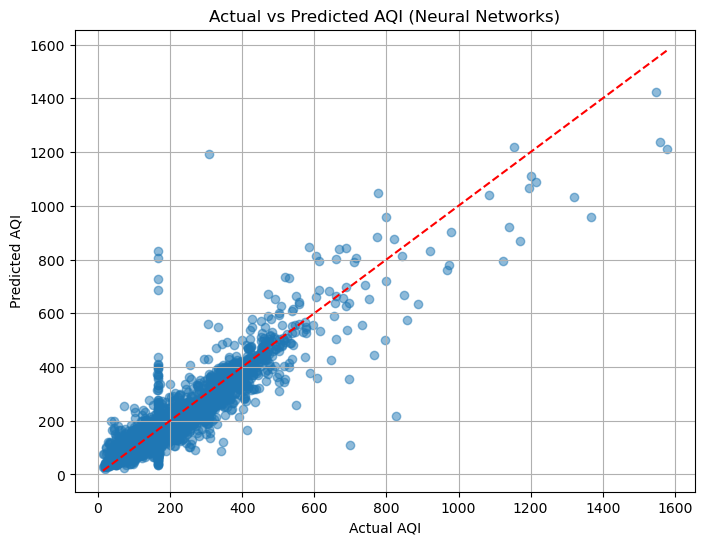

In [137]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, nn_predictions, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted AQI (Neural Networks)')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.grid(True)
plt.show()


In [138]:
from sklearn.tree import DecisionTreeRegressor

# Decision Trees
print("\nDecision Trees:")
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_mae = mean_absolute_error(y_test, dt_predictions)
dt_rmse = mean_squared_error(y_test, dt_predictions, squared=False)
print("MAE:", dt_mae)
print("RMSE:", dt_rmse)



Decision Trees:
MAE: 28.28527143562846
RMSE: 57.298348980659355



Decision Trees:
Predicted AQI values: [166.46358149 166.46358149 139.         ... 121.          70.
 129.        ]


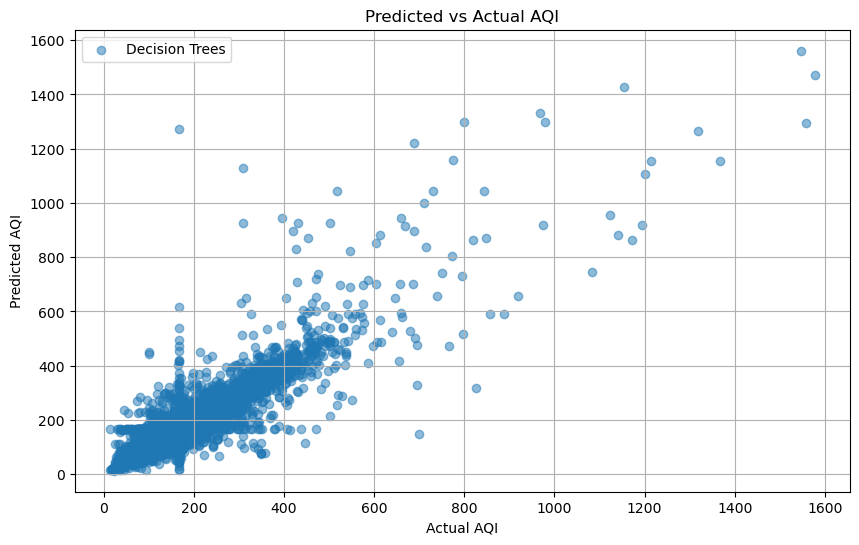

In [139]:
import matplotlib.pyplot as plt

print("\nDecision Trees:")
print("Predicted AQI values:", dt_predictions)


plt.figure(figsize=(10, 6))


plt.scatter(y_test, dt_predictions, label='Decision Trees', alpha=0.5)


plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Predicted vs Actual AQI')
plt.legend()
plt.grid(True)
plt.show()


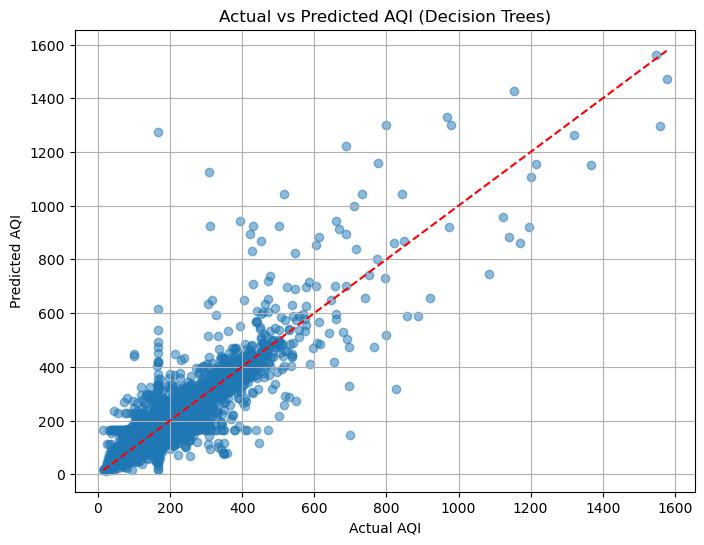

In [140]:
# Plot actual vs predicted values for Decision Trees
plt.figure(figsize=(8, 6))
plt.scatter(y_test, dt_predictions, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted AQI (Decision Trees)')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.grid(True)
plt.show()


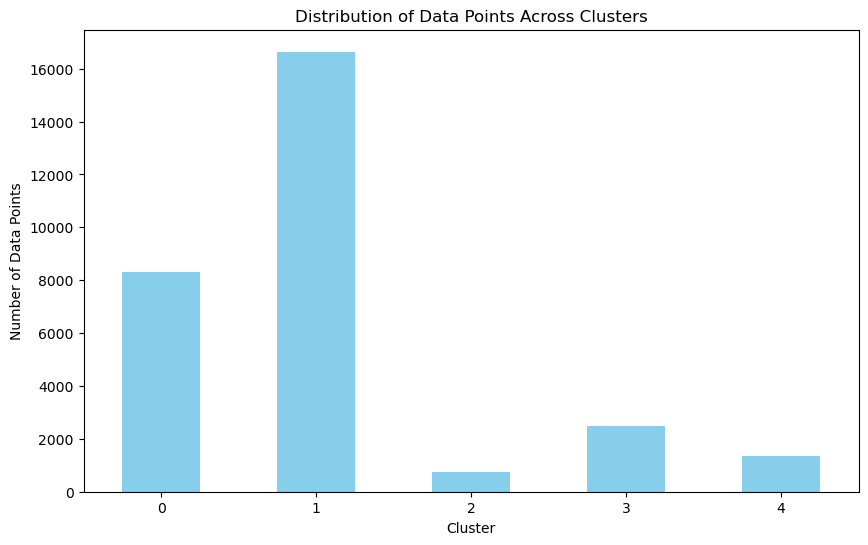

In [141]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


features = d[['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3']]


kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(features)
clusters = kmeans.predict(features)

cluster_centers = kmeans.cluster_centers_
actual_aqi = d['AQI']

cluster_counts = pd.Series(clusters).value_counts().sort_index()

plt.figure(figsize=(10, 6))
cluster_counts.plot(kind='bar', color='skyblue')
plt.xticks(rotation=0)
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.title('Distribution of Data Points Across Clusters')
plt.show()


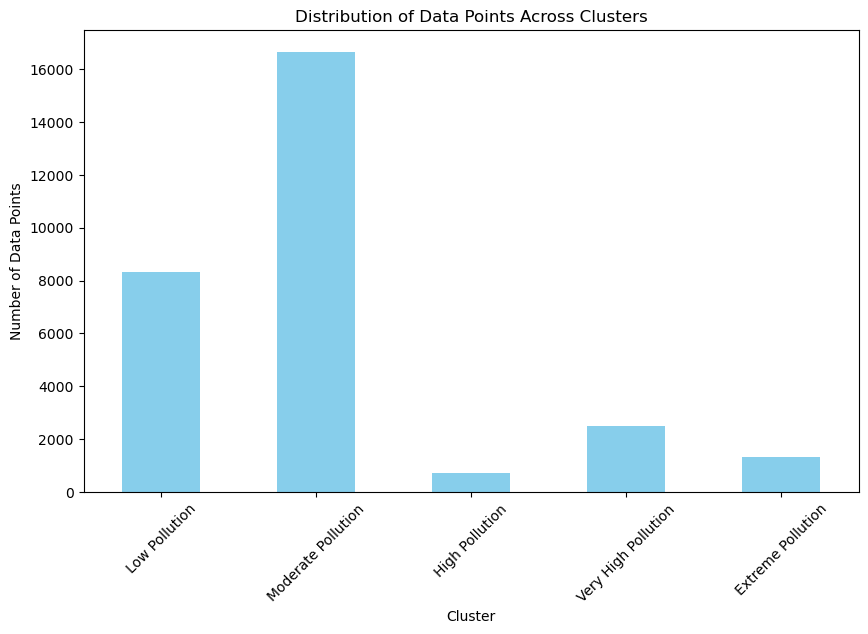

In [142]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt



features = d[['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3']]


kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(features)
clusters = kmeans.predict(features)

cluster_centers = kmeans.cluster_centers_
actual_aqi = d['AQI']

cluster_names = ['Low Pollution', 'Moderate Pollution', 'High Pollution', 'Very High Pollution', 'Extreme Pollution']

cluster_counts = pd.Series(clusters).value_counts().sort_index()

plt.figure(figsize=(10, 6))
cluster_counts.plot(kind='bar', color='skyblue')
plt.xticks(range(len(cluster_names)), cluster_names, rotation=45)
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.title('Distribution of Data Points Across Clusters')
plt.show()


By analyzing feature importance scores obtained from our machine learning model (e.g., Random Forest), we can identify the most influential factors in predicting AQI.

Features with higher importance scores indicate stronger predictive power. This information helps prioritize interventions and mitigation strategies for improving air quality.

In [143]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


X = d.drop(['AQI', 'AQI_Bucket', 'City', 'Date'], axis=1)  # Features excluding non-numeric columns
y = d['AQI']  # Target variable


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


predictions = model.predict(X_test)


X_test['Predicted_AQI'] = predictions


city_predictions = pd.concat([d['City'].iloc[X_test.index], X_test['Predicted_AQI']], axis=1)


print(city_predictions)


               City  Predicted_AQI
22593        Mumbai     143.409632
22459        Mumbai     143.409632
24213         Patna     134.101846
25301         Patna     179.007198
20886       Lucknow     292.782984
...             ...            ...
17614        Jaipur     100.623905
6198      Bengaluru     115.328516
9648        Chennai     125.341898
16507     Hyderabad      88.561160
7395   Brajrajnagar     142.304782

[5907 rows x 2 columns]


In [145]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression




X = d.drop(['AQI', 'AQI_Bucket', 'City', 'Date'], axis=1)  
y = d['AQI']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


predictions = model.predict(X_test)

X_test['Predicted_AQI'] = predictions


X_test['Actual_AQI'] = y_test.values


city_predictions = pd.concat([d['City'].iloc[X_test.index], X_test[['Actual_AQI', 'Predicted_AQI']]], axis=1)


print(city_predictions)


               City  Actual_AQI  Predicted_AQI
22593        Mumbai  166.463581     143.409632
22459        Mumbai  166.463581     143.409632
24213         Patna  137.000000     134.101846
25301         Patna  190.000000     179.007198
20886       Lucknow  339.000000     292.782984
...             ...         ...            ...
17614        Jaipur   79.000000     100.623905
6198      Bengaluru   91.000000     115.328516
9648        Chennai  106.000000     125.341898
16507     Hyderabad   68.000000      88.561160
7395   Brajrajnagar  136.000000     142.304782

[5907 rows x 3 columns]


# Final Model Considered

As the Random forest model gives the least RMSE values and highest R square value, we go eith the random forest regressor for prediction

In [146]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor



X = d.drop(['AQI', 'AQI_Bucket', 'City', 'Date'], axis=1)  
y = d['AQI']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


predictions = model.predict(X_test)


X_test['Predicted_AQI'] = predictions


X_test['Actual_AQI'] = y_test.values


city_predictions = pd.concat([d['City'].iloc[X_test.index], X_test[['Actual_AQI', 'Predicted_AQI']]], axis=1)

print(city_predictions)


               City  Actual_AQI  Predicted_AQI
22593        Mumbai  166.463581     166.463581
22459        Mumbai  166.463581     166.463581
24213         Patna  137.000000     137.957087
25301         Patna  190.000000     185.574636
20886       Lucknow  339.000000     353.604636
...             ...         ...            ...
17614        Jaipur   79.000000      90.219272
6198      Bengaluru   91.000000     101.134636
9648        Chennai  106.000000     110.278543
16507     Hyderabad   68.000000      72.520000
7395   Brajrajnagar  136.000000     148.696358

[5907 rows x 3 columns]


In [147]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor


X = d.drop(['AQI', 'AQI_Bucket', 'City', 'Date'], axis=1)  
y = d['AQI'] 

model = RandomForestRegressor(random_state=42)
model.fit(X, y)

future_dates = pd.date_range(start='2024-04-26', end='2024-05-26', freq='D')  
cities = d['City'].unique()

future_predictions_list = []

for city in cities:
    for date in future_dates:
        future_data = pd.DataFrame({'Date': [date], 'City': [city]})
        
        prediction = model.predict(X.sample())
        prediction = prediction[0]  
        
        future_predictions_list.append({'City': city, 'Date': date, 'Predicted_AQI': prediction})

future_predictions = pd.DataFrame(future_predictions_list)

print(future_predictions)


              City       Date  Predicted_AQI
0        Ahmedabad 2024-04-26     370.450000
1        Ahmedabad 2024-04-27     110.390000
2        Ahmedabad 2024-04-28     148.890000
3        Ahmedabad 2024-04-29     164.512405
4        Ahmedabad 2024-04-30      68.430000
..             ...        ...            ...
801  Visakhapatnam 2024-05-22     154.100000
802  Visakhapatnam 2024-05-23     102.954636
803  Visakhapatnam 2024-05-24      54.090000
804  Visakhapatnam 2024-05-25     122.924636
805  Visakhapatnam 2024-05-26      68.720000

[806 rows x 3 columns]


In [148]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)
print("R-squared:", r2)
#1 is a perfect fit, so closer the value, better is the model


R-squared: 0.8842867326166856


In [149]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 20.360862287376438


Metrics like Mean Squared Error (MSE) provide insights into the model's performance. Lower MSE values indicate better predictive accuracy.

If the model achieves satisfactory MSE values on both the training and testing datasets, 
it suggests that the model generalizes well to unseen data and effectively captures the underlying patterns in the dataset.

Providing safety measures based on predicted AQI levels offers actionable insights for individuals and communities to mitigate exposure to poor air quality.
Tailored recommendations for different AQI categories (e.g., good, moderate, unhealthy) help raise awareness and promote preventive actions such as limiting outdoor activities, using air purifiers, or wearing masks.

# Future Enhancements

1.Integrating the prediction model with openweathermap's data api which contains the weather and temperature of the place

2.Using tkinter to create an interface that takes city name and date as input to display the prediction values

In [ ]:
import tkinter as tk
from tkinter import ttk, messagebox
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import pandas as pd
from datetime import datetime, timedelta
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime


model = RandomForestRegressor()  

def predict_aqi(city, date):
    data = {
        'City': [city],
        'Date': [date]
    }
    input_data = pd.DataFrame(data)
    
    prediction = model.predict(input_data)
    return prediction[0]

def get_safety_measures(aqi):
    if aqi <= 50:
        return "Good - Air quality is considered satisfactory, and air pollution poses little or no risk."
    elif 51 <= aqi <= 100:
        return "Moderate - Air quality is acceptable; however, there may be some health concerns for a very small number of people who are unusually sensitive to air pollution."
    elif 101 <= aqi <= 150:
        return "Unhealthy for Sensitive Groups - Members of sensitive groups may experience health effects. The general public is not likely to be affected."
    elif 151 <= aqi <= 200:
        return "Unhealthy - Everyone may begin to experience health effects; members of sensitive groups may experience more serious health effects."
    elif 201 <= aqi <= 300:
        return "Very Unhealthy - Health alert: everyone may experience more serious health effects."
    else:
        return "Hazardous - Health warnings of emergency conditions. The entire population is more likely to be affected."

def plot_predictions(city):
    dates = [datetime.now() + timedelta(days=i) for i in range(5)]
    aqi_predictions = [predict_aqi(city, date.strftime('%y-%m-%d')) for date in dates]
    
    plt.figure(figsize=(8, 5))
    plt.plot(dates, aqi_predictions, marker='o', linestyle='-')
    plt.xlabel('Date')
    plt.ylabel('AQI Prediction')
    plt.title(f'AQI Predictions for {city} (Next 5 Days)')
    plt.xticks(rotation=45)
    plt.tight_layout()

    fig_canvas = FigureCanvasTkAgg(plt.gcf(), master=window)
    fig_canvas.draw()
    fig_canvas.get_tk_widget().pack(side=tk.BOTTOM, fill=tk.BOTH, expand=True)

def predict_button_click():
    city = city_entry.get()
    date_str = date_entry.get()
    try:
        datetime.strptime(date_str, '%y-%m-%d')
        aqi_prediction = predict_aqi(city, date_str)
        safety_measures = get_safety_measures(aqi_prediction)
        prediction_label.config(text=f"Predicted AQI: {aqi_prediction}\nSafety Measures: {safety_measures}")
        plot_predictions(city)
    except ValueError:
        messagebox.showerror("Error", "Invalid date format. Please enter date in YYYY-MM-DD format.")

window = tk.Tk()
window.title("AQI Predictor")

city_label = ttk.Label(window, text="Enter City:")
city_label.grid(row=0, column=0, padx=5, pady=5)
city_entry = ttk.Entry(window)
city_entry.grid(row=0, column=1, padx=5, pady=5)

date_label = ttk.Label(window, text="Enter Date (YYYY-MM-DD):")
date_label.grid(row=1, column=0, padx=5, pady=5)
date_entry = ttk.Entry(window)
date_entry.grid(row=1, column=1, padx=5, pady=5)

predict_button = ttk.Button(window, text="Predict AQI", command=predict_button_click)
predict_button.grid(row=2, column=0, columnspan=2, padx=5, pady=5)

prediction_label = ttk.Label(window, text="")
prediction_label.grid(row=3, column=0, columnspan=2, padx=5, pady=5)


window.mainloop()
